In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.io.netcdf as nc



# Compare TPE plots on local vs. raijin computers, and for various combinations of detrending and windowing

In [3]:
datapath = '/huron/home/paigemar/Documents/Python_QGCM/Updated_codes_Dec2015/QGCM_transfers_netcdf/'

no_dataname = 'TPEofw_spatial_layer1__yr1_output013_ANUdata_NODETRENDWINDOW_noSpaceDetrend_noSpaceWindow.nc'
preFFT_dataname = 'TPEofw_spatial_layer1__yr1_output013_ANUdata_detrendpreFFT_noSpaceDetrend_noSpaceWindow.nc'
atStart_dataname = 'TPEofw_spatial_layer2__yr1_output013_ANUdata_noSpaceDetrend_noSpaceWindow.nc'

## Load data

In [4]:
# ----------LOCAL----------------

# No detrend/window
data = nc.netcdf_file(datapath+no_dataname,'r')
Tno = data.variables['TPEofw_spatial']
data.close()

# Detrend before FFT
data = nc.netcdf_file(datapath+preFFT_dataname,'r')
Tpre = data.variables['TPEofw_spatial']
data.close()

# Detrend at start
data = nc.netcdf_file(datapath+atStart_dataname,'r')
T = data.variables['TPEofw_spatial']
data.close()

#-----------RAIJIN-----------------

# No detrend/window
T_nodetrend_dask = np.load(datapath+'TPE1_nodetrend_output013.npy')

# Detrend before FFT
T_dask = np.load(datapath+'TPE1_output013.npy')

/opt/packages/AnacondaPython3/4.2.0/lib/python3.5/site-packages/scipy/io/netcdf.py:297: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [5]:
# Define frequency vector

# Long: for 366 days (local)
# Short: for 365 days (raijin)
ktiso_long = (2*np.pi/(366*24*60*60))*np.arange(0,np.floor(366.0/2)+1)
ktiso_short = (2*np.pi/(366*24*60*60))*np.arange(0,np.floor(365.0/2)+1)

## Combine into single plot

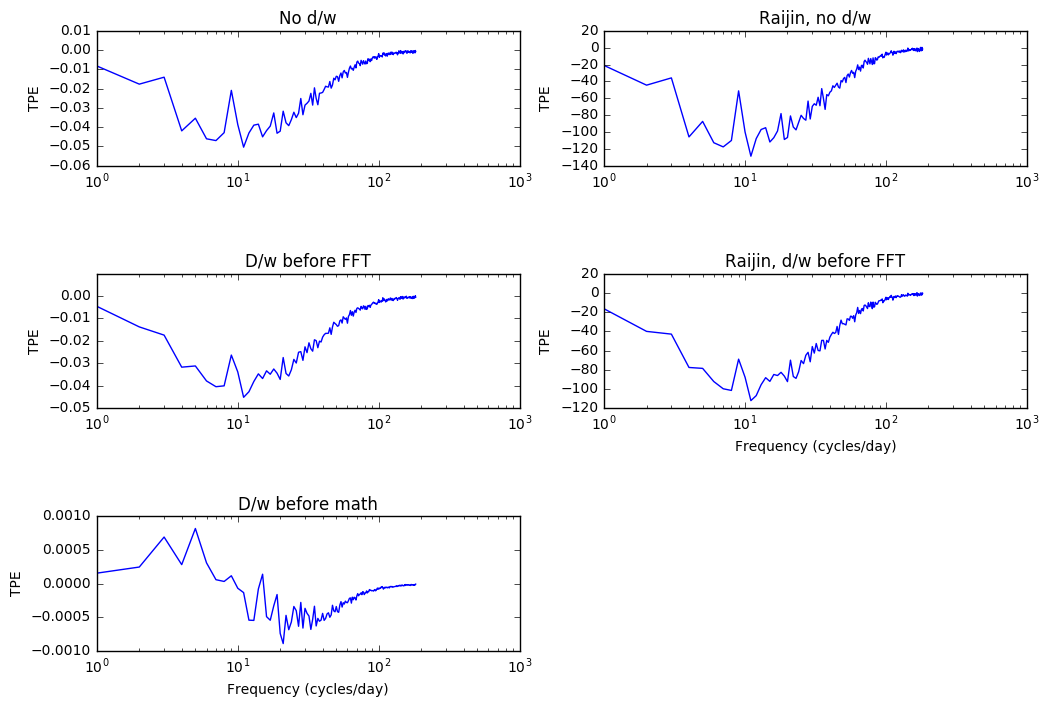

In [6]:
plt.figure()
f, ((ax1,ax4),(ax2,ax5),(ax3,ax6)) = plt.subplots(3,2,sharex=False,sharey=False,figsize=(12,8))
ax1.semilogx(Tno[:]*ktiso_long)
ax1.set_title('No d/w')
ax1.set_ylabel('TPE')
ax2.semilogx(Tpre[:]*ktiso_long)
ax2.set_title('D/w before FFT')
ax2.set_ylabel('TPE')
ax3.semilogx(T[:]*ktiso_long)
ax3.set_title('D/w before math')
ax3.set_ylabel('TPE')
ax3.set_xlabel('Frequency (cycles/day)')



ax4.semilogx(T_nodetrend_dask[:]*ktiso_short*1e9)
ax4.set_title('Raijin, no d/w')
ax4.set_ylabel('TPE')
ax5.semilogx(T_dask[:]*ktiso_short*1e9)
ax5.set_title('Raijin, d/w before FFT')
ax5.set_ylabel('TPE')
ax5.set_xlabel('Frequency (cycles/day)')
ax6.axis('off')
plt.xscale('log')
f.subplots_adjust(hspace=0.8)

In [17]:
print(np.mean(Tpre[:]*ktiso_long))
print(np.mean(T_dask[:]*ktiso_short*1e9))

ratio = np.mean(T_dask[:]*ktiso_short*1e9)/np.mean(Tpre[:]*ktiso_long)
print(ratio)

-0.00928866293942
-23.4274811354
2522.15860218
